In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, Input
from tensorflow.keras.models import Model

In [3]:
data = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:",x_train.shape)

x_train.shape: (50000, 32, 32, 3)


In [4]:
K = len(set(y_train))
print("No of classes:", K)

No of classes: 10


In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', strides=2)(i)
x = Conv2D(64, (3,3), activation='relu', strides=2)(x)
x = Conv2D(128, (3,3), activation='relu', strides=2)(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i,x)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 9s 177us/sample - loss: 1.5619 - accuracy: 0.4315 - val_loss: 1.2556 - val_accuracy: 0.5388
Epoch 2/15
50000/50000 [==============================] - 7s 145us/sample - loss: 1.2638 - accuracy: 0.5429 - val_loss: 1.1139 - val_accuracy: 0.6020
Epoch 3/15
50000/50000 [==============================] - 7s 142us/sample - loss: 1.1318 - accuracy: 0.5940 - val_loss: 1.0371 - val_accuracy: 0.6287
Epoch 4/15
50000/50000 [==============================] - 7s 144us/sample - loss: 1.0259 - accuracy: 0.6355 - val_loss: 0.9677 - val_accuracy: 0.6517
Epoch 5/15
50000/50000 [==============================] - 7s 143us/sample - loss: 0.9522 - accuracy: 0.6616 - val_loss: 0.9135 - val_accuracy: 0.6765
Epoch 6/15
50000/50000 [==============================] - 7s 143us/sample - loss: 0.8935 - accuracy: 0.6828 - val_loss: 0.8835 - val_accuracy: 0.6890
Epoch 7/15
50000/50000 [==========================

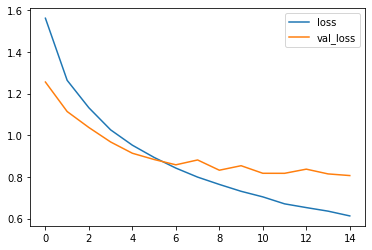

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


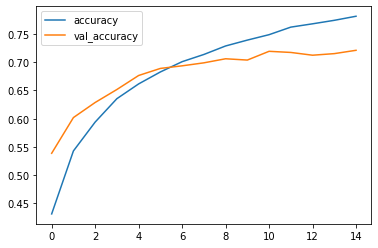

In [9]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[773  16  27  16  20   4   7  17  80  40]
 [ 18 796   2   8   3   6  17   4  33 113]
 [ 89   5 471  62 129  73 104  31  22  14]
 [ 17   7  37 504  89 178 100  35  13  20]
 [ 35   2  21  44 741  29  65  51   9   3]
 [ 11   0  27 156  75 635  45  42   4   5]
 [  5   2  15  36  35  25 864   7   6   5]
 [ 11   1  16  31  76  66   9 764   6  20]
 [ 63  30   5  15   7   6   8   3 836  27]
 [ 29  66   5  10   5   7   7  14  30 827]]


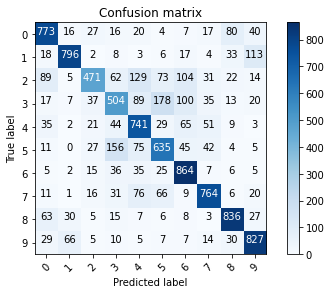

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

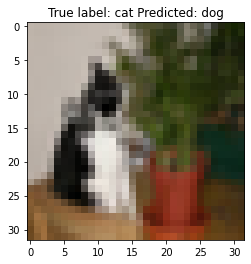

In [12]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));